In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast

import iqplot

import bokeh.io
import bokeh.models
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

In [23]:
Data = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/DataSetNew.csv')
Data.head()

,Unnamed: 0,Date,Fly,Training,ObjectsReinforced,Training Starvation,Test Starvation,Reinforced_side,Relative Time Left,Relative Time Right,...,Visits Right Corner,Durations Right Corner,Visits Top Corner,Durations Top Corner,Visits Left Front,Durations Left Front,Visits Right Front,Durations Right Front,Visits Top Front,Durations Top Front
0,0,22-03-10,1,Ctrl,Orange,Not starved,With Water,Left,0.168639,0.831361,...,"[3, 245, 4841, 4927, 6442, 9011, 12544]","[11, 4062, 83, 1, 277, 1128, 2829]",[550],[28],"[39, 154, 994, 1010, 1504]","[46, 181, 4, 464, 2]","[3, 372, 576, 580, 612, 615, 777, 811, 6249, 7...","[5, 199, 1, 4, 1, 156, 23, 789, 1289, 9, 4, 2,...","[3, 284, 713, 2413, 3080, 3083, 8717, 9183, 92...","[161, 420, 634, 666, 1, 23, 465, 8, 3, 3, 38, ..."
1,0,22-03-10,2,Ctrl,Orange,Not starved,With Water,Left,0.414249,0.585751,...,"[26, 92, 188, 283, 436, 499, 549, 645, 770, 13...","[35, 23, 1, 5, 7, 27, 68, 13, 124, 69, 428, 9,...","[3, 85, 168, 240, 557, 632, 757, 880, 1220, 13...","[5, 47, 9, 32, 32, 18, 42, 39, 28, 42, 8, 73, ...","[132, 231, 449, 1188, 1340, 2705, 2765, 2899, ...","[35, 25, 687, 38, 541, 59, 5, 65, 49, 308, 43,...","[18, 210, 389, 589, 896, 1026, 1168, 2033, 209...","[87, 44, 38, 29, 33, 16, 300, 45, 2, 56, 63, 5...","[42, 139, 244, 678, 1055, 1368, 1528, 1691, 21...","[63, 53, 194, 255, 15, 90, 42, 343, 60, 325, 2..."
2,0,22-03-10,3,Ctrl,Orange,Not starved,With Water,Left,0.534949,0.465051,...,"[567, 739, 862, 1009, 1746, 1971, 2170, 2446, ...","[81, 22, 26, 66, 19, 50, 83, 26, 78, 11, 80, 2...","[106, 377, 443, 814, 1106, 1209, 1696, 1762, 2...","[15, 4, 81, 38, 7, 87, 1, 69, 2, 46, 13, 72, 2...","[3, 143, 279, 320, 550, 705, 850, 938, 1191, 1...","[20, 31, 38, 3, 34, 12, 6, 4, 1, 6, 38, 77, 64...","[111, 201, 593, 886, 1147, 1347, 1605, 1628, 2...","[8, 22, 25, 18, 36, 29, 6, 35, 26, 39, 7, 40, ...","[3, 195, 561, 991, 1150, 1505, 2095, 2818, 305...","[42, 33, 30, 29, 32, 34, 32, 55, 13, 32, 45, 4..."
3,0,22-03-10,4,Ctrl,Orange,Not starved,With Water,Left,0.385910,0.614090,...,"[912, 2363]","[940, 2]",[58],[69],"[1361, 2495, 2499, 2522, 5442, 5465]","[1052, 2, 20, 2917, 2, 6661]","[3, 459, 814, 845, 876, 912, 960, 1112, 1119, ...","[31, 342, 1, 29, 35, 47, 146, 6, 4, 17, 2253, ...","[92, 200, 5799, 6665, 6668, 6671, 6675, 6678, ...","[105, 4188, 861, 2, 1, 1, 2, 1, 1289]"
4,0,22-03-10,5,Ctrl,Orange,Not starved,With Water,Left,0.345411,0.654589,...,"[3, 87, 106, 256, 290, 384, 512, 721, 1081, 10...","[10, 5, 19, 3, 28, 65, 106, 32, 1, 37, 52, 39,...","[116, 153, 197, 264, 436, 523, 658, 758, 990, ...","[27, 40, 36, 61, 8, 47, 45, 23, 40, 53, 53, 55...","[3, 126, 244, 686, 959, 1225, 1384, 1611, 1815...","[49, 28, 22, 29, 29, 32, 41, 31, 43, 35, 38, 4...","[3, 139, 249, 379, 506, 724, 850, 1100, 1486, ...","[18, 98, 20, 29, 93, 34, 36, 34, 69, 43, 38, 6...","[3, 140, 266, 310, 441, 568, 720, 903, 1031, 1...","[1, 67, 36, 12, 23, 30, 37, 22, 34, 36, 16, 9,..."


In [24]:
Data_noWater = Data[Data['Test Starvation'] == "Overnight no Water"]
Data_noWater_Simple = Data_noWater[Data_noWater["Training Starvation"] == "Not starved"]

In [25]:
Melted = pd.melt(Data_noWater_Simple,
                 id_vars=['Training', 'ObjectsReinforced','Reinforced_side',
                          'Fly', 'Date'],
                 value_name = 'Count',
                 value_vars=['Peeks Left', 'Peeks Right', 'Peeks Top', 'Long Peeks Left', 'Long Peeks Right', 'Long Peeks Top','Face Left', 'Face Right', 'Face Top'],
                 var_name='Type')

In [26]:
conditions = [
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Right'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Right') & (Melted['Type'].str.contains('Left'))),
    (Melted['Reinforced_side'].str.contains('Left') & (Melted['Type'].str.contains('Right'))),
    (Melted['Type'].str.contains('Top')),
]

values = ['Rewarded Side', 'Rewarded Side', 'Punished Side', 'Punished Side', 'Empty Side']
Melted['Condition'] = np.select(conditions,values)
Melted.head()

,Training,ObjectsReinforced,Reinforced_side,Fly,Date,Type,Count,Condition
0,Ctrl,Orange,Left,6,22-03-10,Peeks Left,0,Rewarded Side
1,Ctrl,Orange,Left,7,22-03-10,Peeks Left,0,Rewarded Side
2,Ctrl,Orange,Left,8,22-03-10,Peeks Left,0,Rewarded Side
3,Ctrl,Orange,Left,9,22-03-10,Peeks Left,1,Rewarded Side
4,Ctrl,Orange,Left,10,22-03-10,Peeks Left,1,Rewarded Side


In [27]:
conditions = [
    (Melted['Type'].str.contains('Long')),
    (Melted['Type'].str.contains('Face')),
    (('Long' not in Melted['Type']) & ('Face' not in Melted['Type'])) # This is not really working but still gives expected result
]

values = ['Squeeze', 'Fronts', 'Peeks']
Melted['Beh'] = np.select(conditions,values)
Melted.head()

,Training,ObjectsReinforced,Reinforced_side,Fly,Date,Type,Count,Condition,Beh
0,Ctrl,Orange,Left,6,22-03-10,Peeks Left,0,Rewarded Side,Peeks
1,Ctrl,Orange,Left,7,22-03-10,Peeks Left,0,Rewarded Side,Peeks
2,Ctrl,Orange,Left,8,22-03-10,Peeks Left,0,Rewarded Side,Peeks
3,Ctrl,Orange,Left,9,22-03-10,Peeks Left,1,Rewarded Side,Peeks
4,Ctrl,Orange,Left,10,22-03-10,Peeks Left,1,Rewarded Side,Peeks


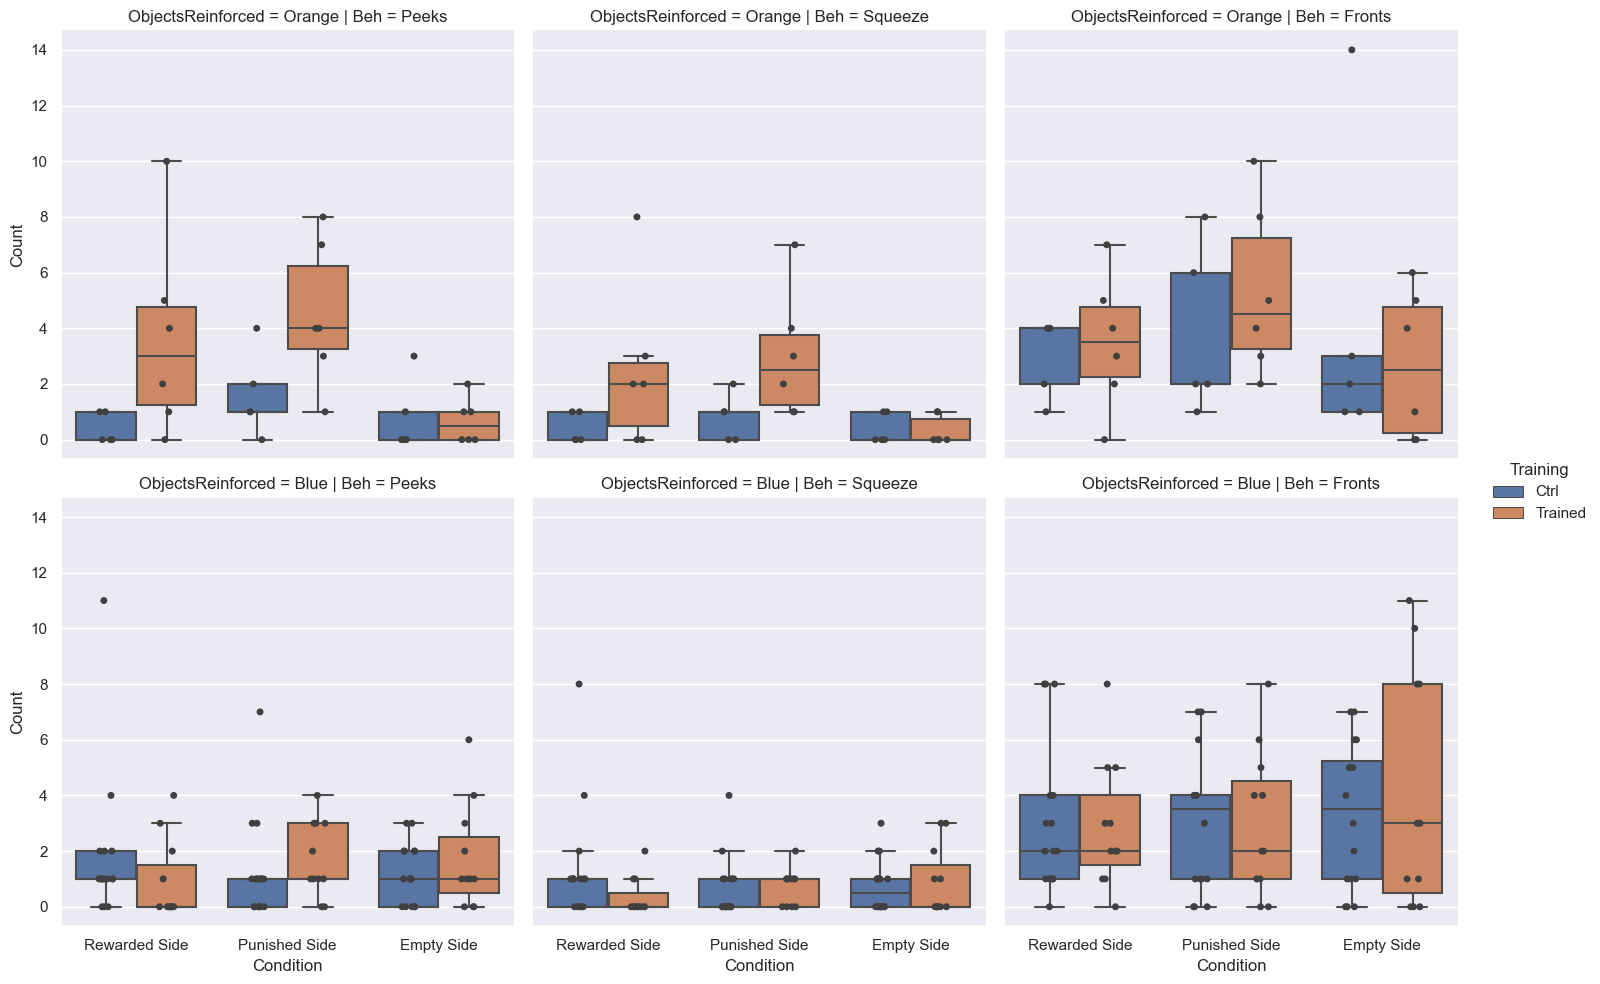

In [29]:
sns.set(font_scale=1)
g=sns.catplot(x='Condition', y = 'Count',
            hue='Training', showfliers = False,
            col='Beh',
            kind="box",
            row='ObjectsReinforced',
            data= Melted)
g.map_dataframe(sns.stripplot,x='Condition', y = 'Count',
            hue='Training', dodge=True,
            palette=["#404040"])
plt.show

plt.savefig('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/220722_BehaviorPlot.png')

In [ ]:
Melted.Training = pd.Categorical(Melted.Training,
                                 categories=['Trained', 'Ctrl'])

In [30]:
TimeData = pd.read_csv('/Volumes/Ramdya-Lab/DURRIEU_Matthias/Experimental_data/MultiSensory_Project/GatedArenas/Results/DataSetNew.csv')

TimeData.head()

,Unnamed: 0,Date,Fly,Training,ObjectsReinforced,Training Starvation,Test Starvation,Reinforced_side,Relative Time Left,Relative Time Right,...,Visits Right Corner,Durations Right Corner,Visits Top Corner,Durations Top Corner,Visits Left Front,Durations Left Front,Visits Right Front,Durations Right Front,Visits Top Front,Durations Top Front
0,0,22-03-10,1,Ctrl,Orange,Not starved,With Water,Left,0.168639,0.831361,...,"[3, 245, 4841, 4927, 6442, 9011, 12544]","[11, 4062, 83, 1, 277, 1128, 2829]",[550],[28],"[39, 154, 994, 1010, 1504]","[46, 181, 4, 464, 2]","[3, 372, 576, 580, 612, 615, 777, 811, 6249, 7...","[5, 199, 1, 4, 1, 156, 23, 789, 1289, 9, 4, 2,...","[3, 284, 713, 2413, 3080, 3083, 8717, 9183, 92...","[161, 420, 634, 666, 1, 23, 465, 8, 3, 3, 38, ..."
1,0,22-03-10,2,Ctrl,Orange,Not starved,With Water,Left,0.414249,0.585751,...,"[26, 92, 188, 283, 436, 499, 549, 645, 770, 13...","[35, 23, 1, 5, 7, 27, 68, 13, 124, 69, 428, 9,...","[3, 85, 168, 240, 557, 632, 757, 880, 1220, 13...","[5, 47, 9, 32, 32, 18, 42, 39, 28, 42, 8, 73, ...","[132, 231, 449, 1188, 1340, 2705, 2765, 2899, ...","[35, 25, 687, 38, 541, 59, 5, 65, 49, 308, 43,...","[18, 210, 389, 589, 896, 1026, 1168, 2033, 209...","[87, 44, 38, 29, 33, 16, 300, 45, 2, 56, 63, 5...","[42, 139, 244, 678, 1055, 1368, 1528, 1691, 21...","[63, 53, 194, 255, 15, 90, 42, 343, 60, 325, 2..."
2,0,22-03-10,3,Ctrl,Orange,Not starved,With Water,Left,0.534949,0.465051,...,"[567, 739, 862, 1009, 1746, 1971, 2170, 2446, ...","[81, 22, 26, 66, 19, 50, 83, 26, 78, 11, 80, 2...","[106, 377, 443, 814, 1106, 1209, 1696, 1762, 2...","[15, 4, 81, 38, 7, 87, 1, 69, 2, 46, 13, 72, 2...","[3, 143, 279, 320, 550, 705, 850, 938, 1191, 1...","[20, 31, 38, 3, 34, 12, 6, 4, 1, 6, 38, 77, 64...","[111, 201, 593, 886, 1147, 1347, 1605, 1628, 2...","[8, 22, 25, 18, 36, 29, 6, 35, 26, 39, 7, 40, ...","[3, 195, 561, 991, 1150, 1505, 2095, 2818, 305...","[42, 33, 30, 29, 32, 34, 32, 55, 13, 32, 45, 4..."
3,0,22-03-10,4,Ctrl,Orange,Not starved,With Water,Left,0.385910,0.614090,...,"[912, 2363]","[940, 2]",[58],[69],"[1361, 2495, 2499, 2522, 5442, 5465]","[1052, 2, 20, 2917, 2, 6661]","[3, 459, 814, 845, 876, 912, 960, 1112, 1119, ...","[31, 342, 1, 29, 35, 47, 146, 6, 4, 17, 2253, ...","[92, 200, 5799, 6665, 6668, 6671, 6675, 6678, ...","[105, 4188, 861, 2, 1, 1, 2, 1, 1289]"
4,0,22-03-10,5,Ctrl,Orange,Not starved,With Water,Left,0.345411,0.654589,...,"[3, 87, 106, 256, 290, 384, 512, 721, 1081, 10...","[10, 5, 19, 3, 28, 65, 106, 32, 1, 37, 52, 39,...","[116, 153, 197, 264, 436, 523, 658, 758, 990, ...","[27, 40, 36, 61, 8, 47, 45, 23, 40, 53, 53, 55...","[3, 126, 244, 686, 959, 1225, 1384, 1611, 1815...","[49, 28, 22, 29, 29, 32, 41, 31, 43, 35, 38, 4...","[3, 139, 249, 379, 506, 724, 850, 1100, 1486, ...","[18, 98, 20, 29, 93, 34, 36, 34, 69, 43, 38, 6...","[3, 140, 266, 310, 441, 568, 720, 903, 1031, 1...","[1, 67, 36, 12, 23, 30, 37, 22, 34, 36, 16, 9,..."


In [34]:
TimeMelted = pd.melt(TimeData, id_vars=['Training', 'ObjectsReinforced',
                                        'Reinforced_side', 'Date', 'Fly'],
                     value_name = 'Values',
                     value_vars=['Visits Left Corner', 'Durations Left Corner',
          'Visits Right Corner', 'Durations Right Corner',
          'Visits Top Corner', 'Durations Top Corner',
          'Visits Left Front', 'Durations Left Front',
          'Visits Right Front', 'Durations Right Front',
          'Visits Top Front', 'Durations Top Front'],
                     var_name="Variable")

TimeMelted[['Values',]] = TimeMelted[['Values',]].applymap(ast.literal_eval)
TimeMelted = TimeMelted.explode('Values').drop_duplicates()

conditions = [
    (TimeMelted['Variable'].str.contains('Durations')),
    (TimeMelted['Variable'].str.contains('Visits')),
]

values = ['Durations', 'Visits']
TimeMelted['Kind'] = np.select(conditions,values)
TimeMelted.head()

conditions = [
    (TimeMelted['Reinforced_side'].str.contains('Right') & (TimeMelted['Variable'].str.contains('Right'))),
    (TimeMelted['Reinforced_side'].str.contains('Left') & (TimeMelted['Variable'].str.contains('Left'))),
    (TimeMelted['Reinforced_side'].str.contains('Right') & (TimeMelted['Variable'].str.contains('Left'))),
    (TimeMelted['Reinforced_side'].str.contains('Left') & (TimeMelted['Variable'].str.contains('Right'))),
    (TimeMelted['Variable'].str.contains('Top')),
]

values = ['Rewarded Side', 'Rewarded Side', 'Punished Side', 'Punished Side', 'Empty Side']
TimeMelted['Condition'] = np.select(conditions,values)
TimeMelted.head()

,Training,ObjectsReinforced,Reinforced_side,Date,Fly,Variable,Values,Kind,Condition
0,Ctrl,Orange,Left,22-03-10,1,Visits Left Corner,NaN,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,129,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,218,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,297,Visits,Rewarded Side
1,Ctrl,Orange,Left,22-03-10,2,Visits Left Corner,359,Visits,Rewarded Side


In [35]:
ReinforcedVisit = TimeMelted[TimeMelted['Condition'] == "Rewarded Side"].reset_index().pivot_table(index = ['Fly', 'Training'], columns = 'Variable', values = 'Values').reset_index()

In [19]:
# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration'
)


p.circle(
    source= LeftCornerVisits[LeftCornerVisits['Training']== 'Trained'],
    x='Visits Left Corner',
    y='Durations Left Corner',
    legend_label = 'Trained flies'
)

p.circle(
    source=LeftCornerVisits[LeftCornerVisits['Training']== 'Ctrl'],
    x='Visits Left Corner',
    y='Durations Left Corner',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)

In [22]:
RightCornerVisits = TimeMelted[TimeMelted['Variable'].isin(['Visits Right Corner', 'Durations Right Corner'])].reset_index().pivot_table(index = ['Fly', 'Training'], columns = 'Variable', values = 'Values').reset_index()

# Create the figure, stored in variable `p`
p = bokeh.plotting.figure(
    frame_width=400,
    frame_height=300,
    x_axis_label='Visits time',
    y_axis_label='Visits duration'
)


p.circle(
    source= RightCornerVisits[RightCornerVisits['Training']== 'Trained'],
    x='Visits Right Corner',
    y='Durations Right Corner',
    legend_label = 'Trained flies'
)

p.circle(
    source=RightCornerVisits[RightCornerVisits['Training']== 'Ctrl'],
    x='Visits Right Corner',
    y='Durations Right Corner',
    color = 'orange',
    legend_label = 'Control flies'
)

bokeh.io.show(p)